# Salary Predictions Based on Job Descriptions

<img src="https://github.com/robinyUArizona/Portfolio-Job-Salary-Predictions-/blob/master/Salary_Pic.PNG?raw=true" style="width:1100px;height:300px" />

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li>Personal information</a></li>
    <li>Import libraries and dependency files</a></li>
    <li>Defining Functions</a></li>
        <ul> 
            <li>Load files into pandas dataframe</a></li>
            <li>Merge training features and target label </a></li>
            <li>Display basic information about the data</a></li>
            <li>Statistical summary</a></li>
            <li>Visualize of the target label</a></li>
            <li>Clean data </a></li>
            <li>One-hot encoding</a></li>
            <li>Target dataframe</a></li>
            <li>Training Model </a></li>  
            <li>Summary of the Model</a></li>
            <li>Training Model </a></li>  
        </ul> 
    <li>Establish the base model</a></li>
    <li>Hypothesize the solutions using the best model</a></li>
    <li>Predict the target using best model</a></li>
    <li>Probability distribution curves between actual salary vs. predicted salary</a></li>
</ul>
    

</div>
 
<hr>

In [1]:
""" Information """

__author__ = "Robin Yadav"

__email__ = "yrobins95@gmail.com"

### Import libraries and dependency files

In [2]:
""" Import libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



""" Importing functions from files """
import import_ipynb
import plot_job_features
from plot_job_features import plot_features


importing Jupyter notebook from plot_job_features.ipynb


### Defining Functions

In [3]:
""" Loads csv files into pandas dataframe """
def load_data(file):
    return pd.read_csv(file)

# load data
train_data = load_data('train.csv')
test_data = load_data('test.csv')

In [4]:
""" Function to print basic information about the data """
def data_info(df):
    print('Shape of the data: ', df.shape)
    print('=====================================================')
    print('Information of the data:')
    print(' ', df.info())    
    print('=====================================================')
    print('Check the duplication of the data:', df.duplicated().sum())
    print('=====================================================')
    print('Check the missing value of the data:\n', df.isnull().sum())
      
        
data_info(train_data)
data_info(test_data)

Shape of the data:  (999995, 7)
Information of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999995 entries, 0 to 999994
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobType              999995 non-null  object
 1   degree               999995 non-null  object
 2   major                999995 non-null  object
 3   industry             999995 non-null  object
 4   yearsExperience      999995 non-null  int64 
 5   milesFromMetropolis  999995 non-null  int64 
 6   salary               999995 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 53.4+ MB
  None
Check the duplication of the data: 10810
Check the missing value of the data:
 jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64
Shape of the data:  (1000000, 6)
Information of the data:


In [5]:
""" Function for Statistical summary""" 
def summary(df):
    display('==== Statistical Summary of Numerical data ====', df.describe(include=np.number))
    display('==== Statistical Summary of Categorical data ====',df.describe(include='O'))
 
summary(train_data)
summary(test_data)

'==== Statistical Summary of Numerical data ===='

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


'==== Statistical Summary of Categorical data ===='

,jobType,degree,major,industry
count,999995,999995,999995,999995
unique,8,5,9,7
top,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,125886,236975,532353,143205


'==== Statistical Summary of Numerical data ===='

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


'==== Statistical Summary of Categorical data ===='

,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000
unique,8,5,9,7
top,VICE_PRESIDENT,HIGH_SCHOOL,NONE,SERVICE
freq,125434,238255,534068,143161


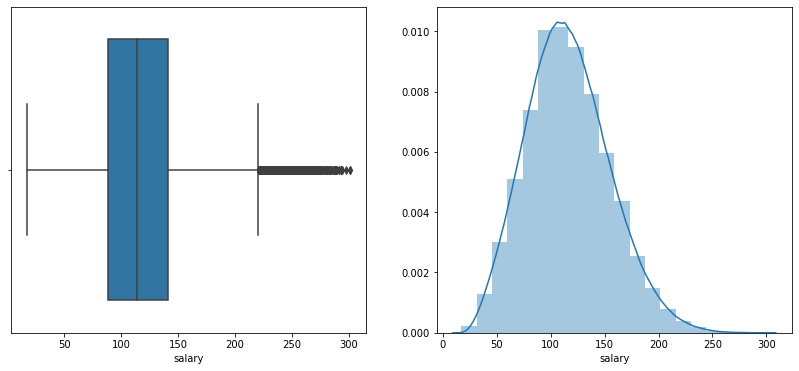

In [6]:
""" Visualize the Salary Variable """
def visualize_salary(df_salary):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df_salary)
    plt.subplot(1,2,2)
    sns.distplot(df_salary, bins=20)
    plt.show()

visualize_salary(train_data['salary'])

In [7]:
## Create X (features) and y(response)
X_train = train_data.drop('salary', axis=1)
display(X_train.head())
y_train = train_data['salary']
display(y_train.head())


,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,CFO,MASTERS,MATH,HEALTH,10,83
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

### Establish a baseline model
<p3>Since there is noticeable variation in salary for different job types, we will use the average salary for each job type as the predicted salary and calculate MSE to establish our baseline. The models that we will be built need to have lower MSE than the baseline.
</p3>

In [8]:
## Average salary based on Job Title
mean_job_type = train_data.groupby("jobType").mean().reset_index()
mean_job_type.drop(columns=["yearsExperience","milesFromMetropolis"],inplace=True)
display(mean_job_type)

pred_bs = train_data.join(mean_job_type.set_index(["jobType"]), on="jobType", how="left",rsuffix="predicted")
def mse(obs,pred):
    total = 0
    for i in range(len(obs)):
        delta = (obs[i]-pred[i])**2
        total += delta
    return total/(len(obs))

mse_baseline = mse(pred_bs.salary.values, pred_bs.salarypredicted.values)
print("RMSE of baseline salary based on Job Type:\n", round(mse_baseline, 5))

,jobType,salary
0,CEO,145.311425
1,CFO,135.458547
2,CTO,135.481067
3,JANITOR,70.813045
4,JUNIOR,95.333087
5,MANAGER,115.368518
6,SENIOR,105.487775
7,VICE_PRESIDENT,125.368630


Base salary based on Job Type:
 963.9253


In [9]:
""" List of numerical and categorical columns """
def num_cat(df):
    
    num_int_type = df.select_dtypes(include='int64').columns.tolist()
    num_float_type = df.select_dtypes(include='float64').columns.tolist()

    num_type = num_int_type + num_float_type
#     print("\n\nNumerical Types columns name: \n", num_type)

    cat_object_type = df.select_dtypes(include='object').columns.tolist()
#     print("\n\nCategorical Types columns name: \n", cat_object_type)
    
    return num_type, cat_object_type

num_type_tn, cat_obj_type_tn = num_cat(X_train)
print(num_type_tn, cat_obj_type_tn)
num_type_tt, cat_obj_type_tt = num_cat(test_data)
print(num_type_tt, cat_obj_type_tt)

['yearsExperience', 'milesFromMetropolis'] ['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis'] ['jobType', 'degree', 'major', 'industry']


In [10]:
""" 
    - Preprocessing datasets for modeling
    - Scaling and encoding  
"""
## Encoding categoirical variables to numeric type - understandable to machine learning model
## scaling numerical variables with mean "0" and standard devaition "1"

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

def num_cat_transformer(num_type, cat_object_type):
    # Preprocessing for numerical features:
    num_transformer = make_pipeline(StandardScaler(),
                                    SimpleImputer(strategy='constant'))

    # Preprocessing for categorical features:
    cat_transformer = make_pipeline(SimpleImputer(strategy='constant'),
                                    OneHotEncoder(sparse=False, handle_unknown='ignore'))

    ## Transforming both numerical and catergorical columns based preprocessing above
    column_transformer = make_column_transformer((num_transformer, num_type),
                                                   (cat_transformer, cat_object_type))
    return column_transformer

column_transformer_tn = num_cat_transformer(num_type_tn, cat_obj_type_tn)
X_train = pd.DataFrame(column_transformer_tn.fit_transform(X_train))
print("Ecnoded and Scaled of the Train dataset ")
display(X_train.head())

column_transformer_tt = num_cat_transformer(num_type_tt, cat_obj_type_tt)
X_test = pd.DataFrame(column_transformer_tt.fit_transform(test_data))
print("Ecnoded and Scaled of the Test dataset ")
display(X_test.head())

Ecnoded and Scaled of the Train dataset 


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.276248,1.159047,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.246801,0.812759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.276248,-0.399248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.553549,-1.126453,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.553549,-1.161082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Ecnoded and Scaled of the Test dataset 


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.386060,0.812524,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.108790,-0.087450,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.692884,-1.402798,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.276979,1.608656,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.277562,-0.191294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
""" Training Model """
def train_model(model, X, y, num_procs, mean_mse, cv_std):
    ## MSE is negative when returned by cross validation
    neg_mse = cross_val_score(model, X, y, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)


In [12]:
""" Summary of the Model """
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

### Hypothesize the Solution

<ul>
    <li>We choose the following model which may be good fit to solve the salary job prediction:  
        <ul>
            <li>1. Model pipeline using StandardScaler()-scaling to unit variance, PCA()-Projecting higher dimensional to lower dimensional space, LinearRegression() </li>
            <li>2. RandomForestRegressor()- A random forest is a meta estimator that is good for predictive accuracy and control over-fitting.</li>
            <li>3. GradientBoostingRegressor()- This cab used for both regression and classification problems, which is an ensemble of weak prediction models, typically decision trees</li>
        </ul>
    </li>
</ul>
<p1> </p1>

In [13]:
# intialize the model list and dicts
models = []
mean_mse = {}
cv_std = {}
# res = {}

# define number of processes to run in parallel
num_procs = 2

# shared model parameters
verbose_lvl = 0


# create models -- hyperparamters tuning 
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                          max_features=30, verbose=verbose_lvl)

gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl)

# list all models
models.extend([lr, lr_std_pca, rf, gbm])

#parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    # pack preprocessing of data and the model in a pipeline:
#     model_steps = make_pipeline(column_transformer_tn, model)
    
    train_model(model, X_train, y_train, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std) 

    
    

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 384.4365983705368
Standard deviation during CV:
 1.3988960759636768

Model:
 Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Average MSE:
 384.43869649823955
Standard deviation during CV:
 1.4036286271404776

Model:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features=30, max_leaf_nodes=None,
                      max_

In [14]:
#choose model with lowest mse
model1 = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model1)



Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Tune the best model


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
""" Need GPU """
# # Search for best parameters
# parameter = {'n_estimators':[100,150,200,250],
#             'max_depth':[4,5,6,7],
#             'learning_rate':[0.1,0.2,0.3,0.4]
#             }

# def param_search(param_grid, n_jobs):
#     estimator = GradientBoostingRegressor() 
#     #cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2)
#     GridCV= GridSearchCV(estimator=estimator, cv=2, param_grid=param_grid, n_jobs=n_jobs) 
#     GridCV.fit(feature_df, target_df) 

#     return GridCV.best_params_ 

# param_search(parameter,2)

' Need GPU '

### Predict the salary using GradientBoostingRegressor() 

In [17]:
best_model = GradientBoostingRegressor(n_estimators=250,learning_rate=0.1, max_depth=5)
best_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# Salary predictions 
predict_salary = best_model.predict(X_test)
display(predict_salary)
display(y_train)

array([111.669524  ,  93.37652722, 179.91870546, ...,  55.31045504,
       160.54122453, 114.62321191])

0         130
1         101
2         137
3         142
4         163
         ... 
999990     88
999991    160
999992     64
999993    149
999994     88
Name: salary, Length: 999995, dtype: int64

### Probability distribution curves between actual salary vs. predicted salary

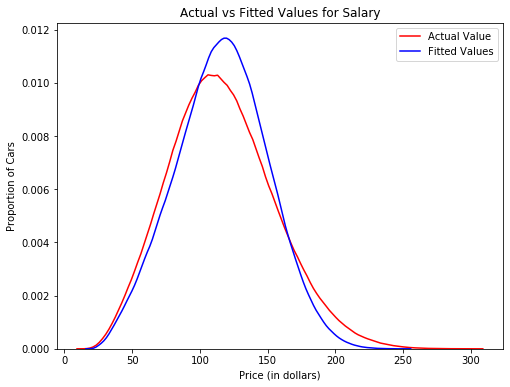

In [19]:
plt.figure(figsize=(8, 6))
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(predict_salary, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Salary')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()